Dataset link

This dataset is designed for the HR team to understand the factors that lead a person to leave their current job and work for a Data company. By using data such as the candidate’s education, demographics, experience, etc. you will need to predict if the candidate will change his/her job or not (binary classification). Further details about the data can be found in the Description of the dataset. For this task, you will need to do the following (note: this is a list of tasks that should be covered, but it is not limited to this):

Cleaning

a. Handle missing values (please explain in the comments the reasoning behind the approach you took)

b. Handle categorical data

Analyzing 

a. Do EDA (Exploratory Data Analysis)

b. Check how (un)balanced the data and comment on possible effects

c. Show the correlation matrix

Feature engineering

a. Determine which features should be included in the final dataset (comment on the approach and conclusions)

b. Create a new dataset with the selected cleaned features

Modeling

a. Train at least two models (comment on the model choice)

b. Compare the models against a minimum of three metrics (comment on the metric choice)

c. Fine-tune one model with grid search

d. Perform cross validation and comment on the results

e. Save the best model

Results

a. Save the test results to a csv file with columns employee_id, target

b. Create a function which will have employee_id as input, and return the predicted target value from the file

Make sure to comment the code!
All of the code and files need to be available on your github repository.

Once you create the repository, please send us the link, and remember to commit regularly! In case you have any questions, feel free to reach out! Good luck!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statistics 
from pandas import get_dummies
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
from imblearn.pipeline import Pipeline as imbPipe
from xgboost import  XGBClassifier
import warnings
warnings.filterwarnings("ignore")

## Load and check data

In [2]:
train_data = pd.read_csv("D://aug_train.csv")
test_data = pd.read_csv("D://aug_test.csv")
sample_submission = pd.read_csv("D://sample_submission.csv")
enrollee_id = test_data["enrollee_id"]

#  Exploatory Data Analysis (EDA)

In [3]:
print('Number of Rows and Columns in train dataset:', train_data.shape)
print('Number of Rows and Columns in test dataset:', test_data.shape)
print('The shape of sample submission dataset: ', sample_submission.shape)

Number of Rows and Columns in train dataset: (19158, 14)
Number of Rows and Columns in test dataset: (2129, 13)
The shape of sample submission dataset:  (2129, 2)


In [4]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


When we look the first 5 rows of data, we can see that there is a lot of missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [7]:
sample_submission.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [8]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Variable description

1. enrollee_id : Unique ID for enrollee

2. city : City code

3. city_development_index : Developement index of the city (scaled)

4. gender : Registered person gender (Male/Female)

5. relevent_experience : Relevent experience

6. enrolled_university : Type of university of the enrolee

7. education_level : education level

8. major_discipline : education discipline of enrollee

9. experience : Total experience in years

10. company_size : Number of employees in current employer's company

11. company_type : Type of current employer

12. last_new_job : Difference in years between previous job and current job

13. training_hours : training hours completed

14. target : 0 – Not looking for job change, 1 – Looking for a job change

###  As most of the Data is Categorical we will plot Bar/Pie charts to visualize the Categorical Data

In [9]:
# Function to Plot Bar Graph

def plot_bar_graph (column, order=None):
    x = train_data[column].value_counts().index
    y = train_data[column].value_counts().values
    sns.barplot(x, y, order=order)
    
# Funtion to Plot Pie Chart
def plot_pie_chart(column, title=''):
    values = train_data[column].value_counts().values
    labels = train_data[column].value_counts().index
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.pie(x=values, labels=labels, autopct='%1.2f%%')

2.1. Pie Chart for Gender

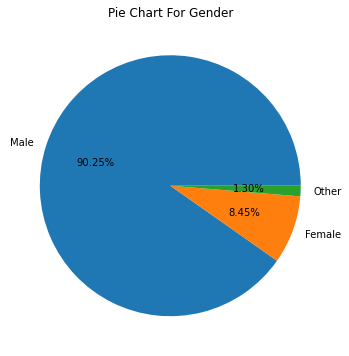

In [10]:
plot_pie_chart('gender', title='Pie Chart For Gender')
plt.show()

As we can see, most of the cnadidates are Male

2.2. Enrolled University

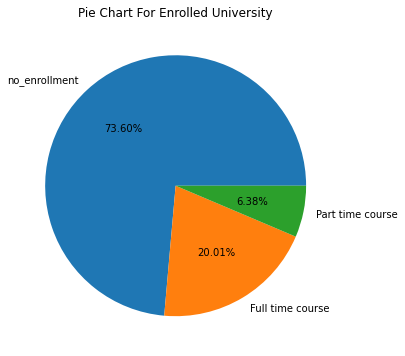

In [11]:
plot_pie_chart('enrolled_university', title='Pie Chart For Enrolled University')
plt.show()

We can see that most of the employes has no enrollment in the University

2.3 Education level

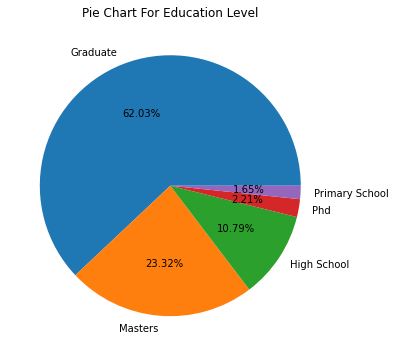

In [12]:
plot_pie_chart('education_level', title='Pie Chart For Education Level')
plt.show()

We see the distribution of the education level feature within the data. It consists mostly of graduates.

2.4. Major discipline

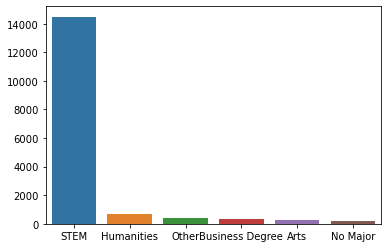

In [13]:
plot_bar_graph('major_discipline')
plt.show()

As we can see in the graph, most of the Candidates are from STEM.

2.5. Company size

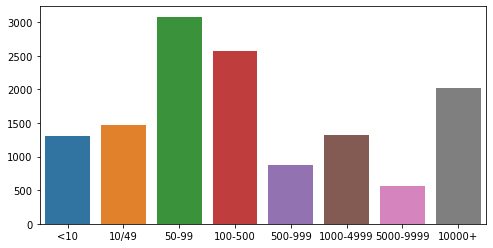

In [14]:
plt.figure(figsize=(8, 4))
order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
plot_bar_graph('company_size', order=order)
plt.show()

As we can see , most of the people are in the companies between 50 and 100 men, and 100 to 500 men.

2.6. Company type

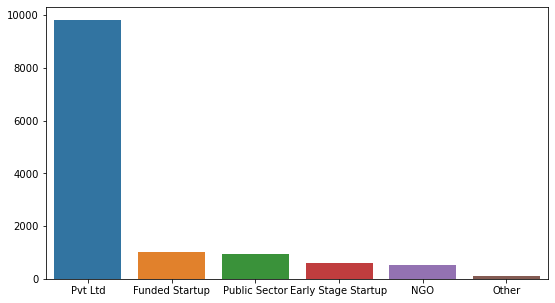

In [15]:
plt.figure(figsize=(9, 5))
plot_bar_graph('company_type')
plt.show()

From above, we can see that the maximum number of people who are looking for new job are from private companies.

2.7. How many Jobs Candidates Worked before joining the current company

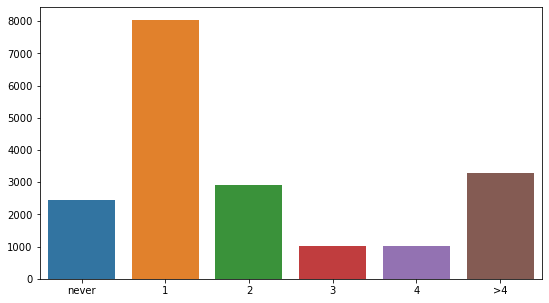

In [16]:
plt.figure(figsize=(9, 5))
order = ['never', '1', '2', '3', '4', '>4']
plot_bar_graph('last_new_job', order=order)
plt.show()

the difference with their old job is usually 1 year.

2.8. Distribution of Training Hours

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

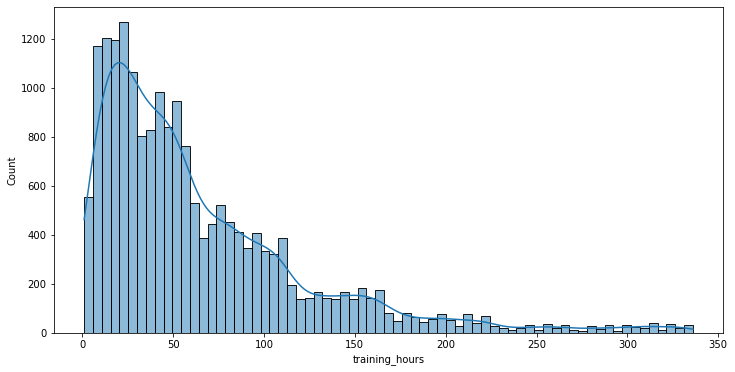

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['training_hours'], kde=True)

We can se that the most Candidates trained for 20 to 50 hours.

#  CLEANING DATA

### Visualize missing values in dataset

(19158, 14)


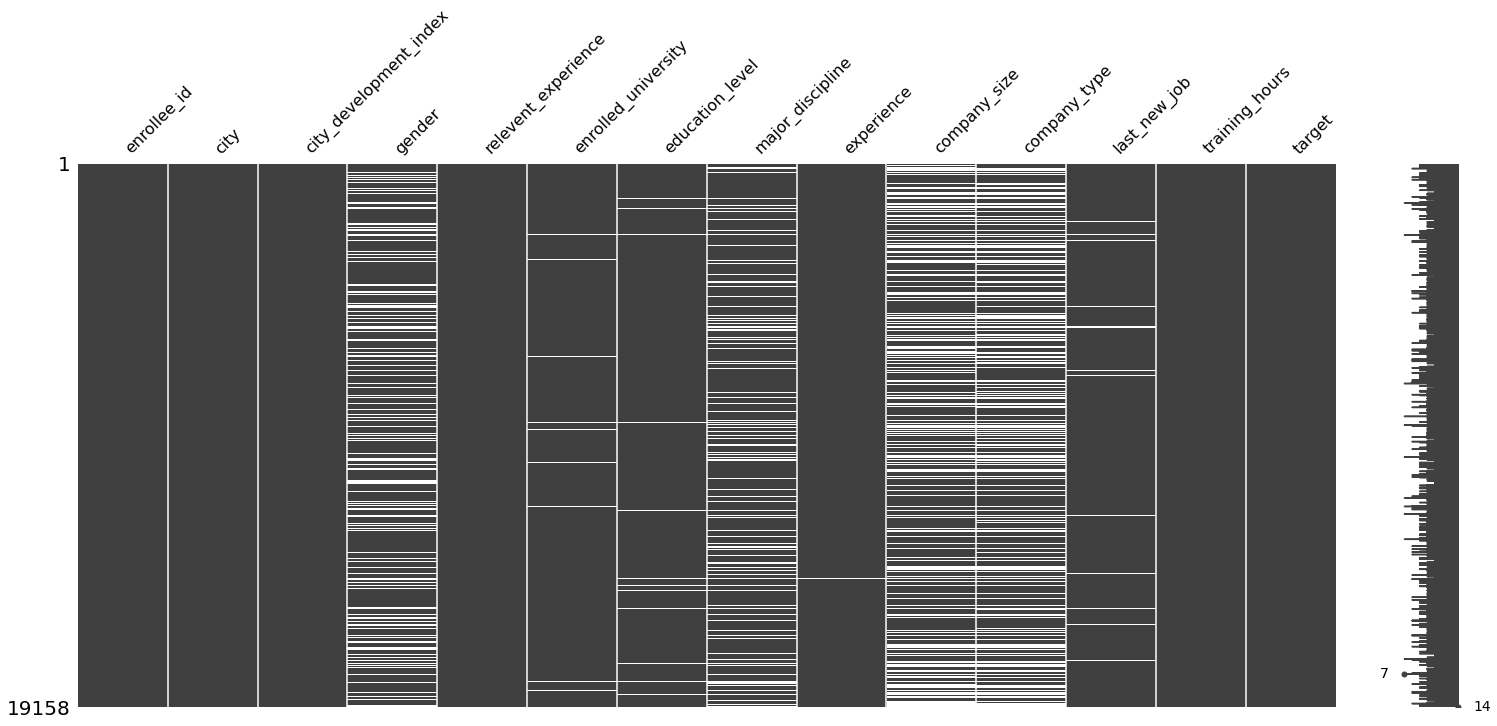

In [18]:
import missingno as msno
print(train_data.shape)
msno.matrix(train_data);

Using this matrix you can very quickly find the pattern of missingness in the dataset. In our case, the columns company_size and company_type have more or less similar pattern of missing values while gender and major_discipline shows a different pattern.

### Transforming data to required format

In [19]:
def clean_experience(df):
    for i in df["experience"]:
        if(i==">20"):
            df["experience"][df["experience"]==i]=27
        if(i == "<1"):
            df["experience"][df["experience"]==i]=0
clean_experience(train_data)
clean_experience(test_data)

train_data["experience"] = train_data["experience"].fillna(0)
train_data["experience"] = train_data['experience'].astype('int')
test_data["experience"] = test_data["experience"].fillna(0)
test_data["experience"] = test_data['experience'].astype('int')

### We will replace NAN Values  with "Unknown".

In [20]:
def clean_NAN(df):
    df["gender"] = df["gender"].fillna("Unknown")
    df["education_level"]=df["education_level"].fillna("Unknown")
    df["major_discipline"].fillna(value="Unknown", inplace=True)
    df["experience"] = df["experience"].fillna(df["experience"].mean())
    df["company_type"] = df["company_type"].fillna("Unknown")

In [21]:
clean_NAN(train_data)
clean_NAN(test_data)

### Cleaning company_size to attain the required format and split them into min and max company_size.

In [22]:
def clean_company_size_1(df):
    converted_list_1 = []
    converted_list_2 = []
    converted_list_3 = []
    for i in df["company_size"]:
        if i == "10/49":
            i = "10-49"
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == "<10":
            i = '1-9'
            converted_list_2.append(i)
        converted_list_2.append(i)
        if i == "10000+":
            i = '10000-20000'
            converted_list_3.append(i)
        converted_list_3.append(i)
    df["company_size"]=pd.Series(converted_list_1)
    df["company_size"]=pd.Series(converted_list_2)
    df["company_size"]=pd.Series(converted_list_3)
    df["company_size"]=df["company_size"].fillna("0-0")
    new = df['company_size'].str.split("-", n = 1, expand = True) 
    df['company_size_min']= new[0]
    df['company_size_max']= new[1] 
    df["company_size_max"] = df['company_size_max'].astype('int')
    df["company_size_min"] = df['company_size_min'].astype('int')

clean_company_size_1(train_data)
clean_company_size_1(test_data)

In [23]:
def clean_last_new_job(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["last_new_job"]:
        if i == "never" or i == np.NaN:
            i = 0
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == ">4":
            i = 6
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["last_new_job"]=pd.Series(converted_list_1)
    df["last_new_job"]=pd.Series(converted_list_2)
    
clean_last_new_job(train_data)
clean_last_new_job(test_data)

In [24]:
def clean_city(df):
    converted_list_1 = []
    for i in range(len(df["city"])):
        j = df["city"][i].replace("city_","")
        converted_list_1.append(j)
    df["city"]=pd.Series(converted_list_1)
    
clean_city(train_data)
clean_city(test_data)

In [25]:
def clean_relevent_experience(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["relevent_experience"]:
        if i == "Has relevent experience":
            i = 1
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == "No relevent experience":
            i = 0
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["relevent_experience"]=pd.Series(converted_list_1)
    df["relevent_experience"]=pd.Series(converted_list_2)
    
clean_relevent_experience(train_data)
clean_relevent_experience(test_data)

## Correlation Matrix Plot

A correlation matrix is a tabular data representing the 'correlations' between pairs of variables in a given data. ... Each row and column represents a variable, and each value in this matrix is the correlation coefficient between the variables represented by the corresponding row and column.

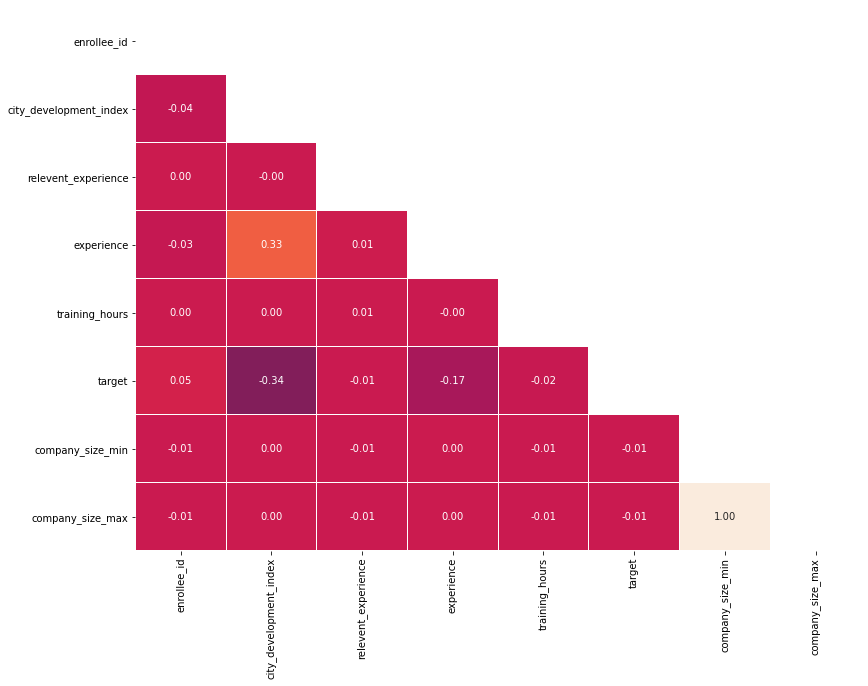

In [26]:
matrix = np.triu(train_data.corr())
plt.figure(figsize=(13, 10))
sns.heatmap(train_data.corr(), annot = True, fmt=".2f", mask = matrix,
            vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False)
plt.show()

### One Hot encoding 

#### (process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.)

In [27]:
def one_hot_encoding(df):
    enrolled_dummies = pd.get_dummies(df["enrolled_university"], dummy_na=True)
    gender_dummies = pd.get_dummies(df["gender"], dummy_na=True)
    education_dummies = pd.get_dummies(df["education_level"],dummy_na=True)
    stream_dummies = pd.get_dummies(df["major_discipline"],dummy_na=True)
    company_dummies = pd.get_dummies(df["company_type"],dummy_na=True)
    df["Type_no_enrollment"] = enrolled_dummies["no_enrollment"]
    df["Type_Full_time_course"] = enrolled_dummies["Full time course"]
    df["Type_Part_time_course"]=enrolled_dummies["Part time course"]
    df["Gender_Male"] = gender_dummies["Male"]
    df["Gender_Female"] =gender_dummies["Female"]
    df["Gender_Unknown"]=gender_dummies["Unknown"]
    df["Gender_Other"]=gender_dummies["Other"]
    df["Education_Graduate"] = education_dummies["Graduate"]
    df["Education_Masters"] = education_dummies["Masters"]
    df["Education_High_School"] = education_dummies["High School"]
    df["Education_Primary_School"] = education_dummies["Primary School"]
    df["Education_Phd"] = education_dummies["Phd"]
    df["Education_Unknown"] = education_dummies["Unknown"]
    df["Stream_STEM"] = stream_dummies["STEM"]
    df["Stream_Humanities"] = stream_dummies["Humanities"]
    df["Stream_Other"] = stream_dummies["Other"]
    df["Stream_Business_Degree"] = stream_dummies["Business Degree"]
    df["Stream_Arts"] = stream_dummies["Arts"]
    df["Stream_No_Major"] = stream_dummies["No Major"]
    df["Stream_Unknown"] = stream_dummies["Unknown"]
    df["Company_Pvt_Ltd"] = company_dummies["Pvt Ltd"]
    df["Company_Funded_Startup"] = company_dummies["Funded Startup"]
    df["Company_Public_Sector"]=company_dummies["Public Sector"]
    df["Company_Early_Stage_Startup"] = company_dummies["Early Stage Startup"]
    df["Company_NGO"] = company_dummies["NGO"]
    df["Company_Other"] = company_dummies["Other"]
    df["Company_Unknown"] = company_dummies["Unknown"]
one_hot_encoding(train_data)
one_hot_encoding(test_data)

In [28]:
train_data = train_data.dropna(subset=['enrolled_university',"last_new_job"])
test_data = test_data.dropna(subset=['enrolled_university',"last_new_job"])

### Replacing the NaN values with the average (mean)

In [29]:
def clean_company_size_2(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["company_size_min"]:
        if i == 0:
            i = int(df["company_size_min"].mean())
            converted_list_1.append(i)
        converted_list_1.append(i)
    for i in df["company_size_max"]:
        if i == 0:
            i = int(df["company_size_max"].mean())
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["company_size_min"]=pd.Series(converted_list_1)
    df["company_size_max"]=pd.Series(converted_list_2)
    
    train_data["company_size_min"] = train_data["company_size_min"].fillna(int(train_data["company_size_min"].mean()))
    train_data["company_size_max"] = train_data["company_size_max"].fillna(int(train_data["company_size_max"].mean()))

    test_data["company_size_min"] = test_data["company_size_min"].fillna(int(test_data["company_size_min"].mean()))
    test_data["company_size_max"] = test_data["company_size_max"].fillna(int(test_data["company_size_max"].mean()))

clean_company_size_2(test_data)
clean_company_size_2(train_data)

In [30]:
test_data.isnull().sum()

enrollee_id                    0
city                           0
city_development_index         0
gender                         0
relevent_experience            0
enrolled_university            0
education_level                0
major_discipline               0
experience                     0
company_size                   0
company_type                   0
last_new_job                   0
training_hours                 0
company_size_min               0
company_size_max               0
Type_no_enrollment             0
Type_Full_time_course          0
Type_Part_time_course          0
Gender_Male                    0
Gender_Female                  0
Gender_Unknown                 0
Gender_Other                   0
Education_Graduate             0
Education_Masters              0
Education_High_School          0
Education_Primary_School       0
Education_Phd                  0
Education_Unknown              0
Stream_STEM                    0
Stream_Humanities              0
Stream_Oth

### Cleaning successfully done !!😎

## Checking is data unbalanaced:

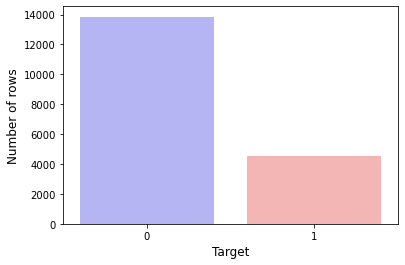

In [31]:
plt.figure(figsize=(6, 4))
sns.barplot(train_data.target.value_counts().index.astype(int),
            train_data.target.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show();

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class.

In [32]:
test_data.index = np.arange(0,len(test_data))

In [33]:
test_data_copy = test_data.copy()
test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,Stream_Arts,Stream_No_Major,Stream_Unknown,Company_Pvt_Ltd,Company_Funded_Startup,Company_Public_Sector,Company_Early_Stage_Startup,Company_NGO,Company_Other,Company_Unknown
0,32403,41,0.827,Male,1,Full time course,Graduate,STEM,9,1-9,...,0,0,0,0,0,0,0,0,0,1
1,9858,103,0.920,Female,1,no_enrollment,Graduate,STEM,5,0-0,...,0,0,0,1,0,0,0,0,0,0
2,31806,21,0.624,Male,0,no_enrollment,High School,Unknown,0,0-0,...,0,0,1,1,0,0,0,0,0,0
3,27385,13,0.827,Male,0,no_enrollment,Masters,STEM,11,10-49,...,0,0,0,1,0,0,0,0,0,0
4,27724,103,0.920,Male,1,no_enrollment,Graduate,STEM,27,10000-20000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,1289,103,0.920,Male,0,no_enrollment,Graduate,Humanities,16,1-9,...,0,0,0,0,0,1,0,0,0,0
2059,195,136,0.897,Male,0,no_enrollment,Masters,STEM,18,500-999,...,0,0,0,0,0,0,0,0,0,1
2060,31762,100,0.887,Male,0,no_enrollment,Primary School,Unknown,3,50-99,...,0,0,1,1,0,0,0,0,0,0
2061,7873,102,0.804,Male,0,Full time course,High School,Unknown,7,50-99,...,0,0,1,0,0,1,0,0,0,0


## Create a new dataset with the selected cleaned features

In [34]:
train_data = train_data.drop(['enrollee_id','gender','enrolled_university','education_level','major_discipline','company_type','company_size'],axis=1)
test_data = test_data.drop(['enrollee_id','gender','enrolled_university','education_level','major_discipline','company_type',"company_size"],axis=1)

In [35]:
X = train_data.drop("target", axis=1)
Y = pd.DataFrame(train_data["target"])

### Data Upscaling using SMOTE technique

A simple way to generate synthetic samples is to randomly sample the attributes from instances in the minority class.
From this we can clearly see that the target 0 is in majority which will effect our model so we will use SMOTE (Synthetic Minority Over-sampling Technique) which will help us to create more synthetic data for the minority class 1.

In [36]:
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

In [37]:
X

,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,company_size_min,company_size_max,Type_no_enrollment,Type_Full_time_course,...,Stream_Arts,Stream_No_Major,Stream_Unknown,Company_Pvt_Ltd,Company_Funded_Startup,Company_Public_Sector,Company_Early_Stage_Startup,Company_NGO,Company_Other,Company_Unknown
0,103,0.920000,1,27,1,36,2123,4474,1,0,...,0,0,0,0,0,0,0,0,0,1
1,40,0.776000,0,15,6,47,2123,4474,1,0,...,0,0,0,1,0,0,0,0,0,0
2,21,0.624000,0,5,6,83,50,99,0,1,...,0,0,0,0,0,0,0,0,0,1
3,162,0.767000,0,27,0,8,2123,4474,1,0,...,0,0,0,0,1,0,0,0,0,0
4,176,0.764000,0,11,4,24,50,99,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27701,21,0.624000,1,0,1.74684,35,50,99,0,0,...,0,0,0,0,0,0,0,0,0,0
27702,97.8332,0.679527,0,4,0,28,1000,4999,0,0,...,0,0,0,0,0,0,0,0,0,1
27703,21,0.624000,0,12,0,46,10000,20000,1,0,...,0,0,0,0,0,0,0,0,0,0
27704,21,0.624000,1,1,3.48759,196,10000,20000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Y["target"].value_counts()

0.0    13853
1.0    13853
Name: target, dtype: int64

### Data balanced successfully! 😎

In [39]:
train_data_final = X.copy()
train_data_final['target'] = Y
test_data_final = test_data.copy() 

In [40]:
train_data_final.to_csv("Job_Change_Prediction.csv")

In [41]:
cols_to_be_normalized = ["city","city_development_index","experience","last_new_job","training_hours","company_size_min","company_size_max"]
cols_not_to_be_normalized = ["relevent_experience","Type_no_enrollment","Type_Full_time_course","Type_Part_time_course","Gender_Male","Gender_Female","Gender_Unknown",
                            "Gender_Other","Education_Graduate","Education_Masters","Education_High_School","Education_Primary_School","Education_Phd",
                            "Education_Unknown","Stream_STEM","Stream_Humanities","Stream_Other","Stream_Business_Degree","Stream_Arts","Stream_No_Major",
                            "Stream_Unknown","Company_Pvt_Ltd","Company_Funded_Startup","Company_Public_Sector", "Company_Early_Stage_Startup", "Company_NGO",
                            "Company_Other", "Company_Unknown", "target"]

## Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [42]:
train_normalized = normalize(train_data_final[cols_to_be_normalized])
train_boolean = train_data_final[cols_not_to_be_normalized]
df_train_normalized = pd.DataFrame(train_normalized,columns = cols_to_be_normalized)
df_train_boolean = pd.DataFrame(train_boolean,columns=cols_not_to_be_normalized)

In [43]:
cols_to_be_normalized = ["city","city_development_index","experience","last_new_job","training_hours","company_size_min","company_size_max"]
cols_not_to_be_normalized = ["relevent_experience","Type_no_enrollment","Type_Full_time_course","Type_Part_time_course","Gender_Male","Gender_Female","Gender_Unknown",
                            "Gender_Other","Education_Graduate","Education_Masters","Education_High_School","Education_Primary_School","Education_Phd",
                            "Education_Unknown","Stream_STEM","Stream_Humanities","Stream_Other","Stream_Business_Degree","Stream_Arts","Stream_No_Major",
                            "Stream_Unknown","Company_Pvt_Ltd","Company_Funded_Startup","Company_Public_Sector", "Company_Early_Stage_Startup", "Company_NGO",
                            "Company_Other", "Company_Unknown"]

In [44]:
test_normalized = normalize(test_data_final[cols_to_be_normalized])
test_boolean = test_data_final[cols_not_to_be_normalized]
df_test_normalized = pd.DataFrame(test_normalized,columns = cols_to_be_normalized)
df_test_boolean = pd.DataFrame(test_boolean,columns=cols_not_to_be_normalized)

In [45]:
df_train_final = df_train_normalized.merge(df_train_boolean,left_index=True, right_index=True)
df_test_final = df_test_normalized.merge(df_test_boolean,left_index=True, right_index=True)
df_test_final.index = np.arange(0,len(df_test_final))
df_test_final

,city,city_development_index,experience,last_new_job,training_hours,company_size_min,company_size_max,relevent_experience,Type_no_enrollment,Type_Full_time_course,...,Stream_Arts,Stream_No_Major,Stream_Unknown,Company_Pvt_Ltd,Company_Funded_Startup,Company_Public_Sector,Company_Early_Stage_Startup,Company_NGO,Company_Other,Company_Unknown
0,0.857395,0.017294,0.188209,0.020912,0.439153,0.020912,0.188209,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.020697,0.000185,0.001005,0.000201,0.019692,0.428205,0.903229,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.004221,0.000125,0.000000,0.000000,0.003015,0.428374,0.903586,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,0.002613,0.000166,0.002211,0.000201,0.007840,0.428364,0.903566,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.020698,0.000185,0.005426,0.001206,0.014469,0.428237,0.903296,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,0.197824,0.001767,0.030730,0.001921,0.028809,0.192062,0.960311,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2059,0.257144,0.001696,0.034034,0.001891,0.056723,0.189076,0.945381,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2060,0.008945,0.000079,0.000268,0.000089,0.001610,0.447231,0.894372,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2061,0.020497,0.000162,0.001407,0.001206,0.016880,0.428228,0.903278,0,0,1,...,0,0,1,0,0,1,0,0,0,0


### Splitting Independent & dependent varaiables

In [46]:
X = df_train_final.drop("target",axis = 1)
Y = df_train_final["target"]

## Train/Test Split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42,shuffle=True, stratify = Y)

# MODELING

ROC AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting ROC AUC is as the probability that the model ranks a random positive example more highly than a random negative example. 

In [48]:
def plot_roc_auc(y_test,y_pred):
    from plot_metric.functions import BinaryClassification
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 0"])

    # Figures
    plt.figure(figsize=(8,7))
    bc.plot_roc_curve()
    
    plt.show()    

In [49]:
import numpy as np
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [50]:
# model accuracy
result = []

## 1. KNN Classifier

In KNN & XGBoost we will use Grid Search. Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model.

In [51]:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), 
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,Y_train)
y_pred_knn = clf.predict(X_test)
acc_random_knn = accuracy_score(Y_test, y_pred_knn)
fscore = f1_score(Y_test,y_pred_knn)
result.append(acc_random_knn)

print('\n')
print("RESULTS : ")
print("KNN Model Acc : ", round(acc_random_knn,2))
print("KNN Model F1-score : ", round(fscore,2))
print("Report : \n",classification_report(Y_test,y_pred_knn))
print('\n')


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.5min finished




RESULTS : 
KNN Model Acc :  0.82
KNN Model F1-score :  0.81
Report : 
               precision    recall  f1-score   support

         0.0       0.79      0.86      0.82      4572
         1.0       0.85      0.77      0.81      4571

    accuracy                           0.82      9143
   macro avg       0.82      0.82      0.82      9143
weighted avg       0.82      0.82      0.82      9143





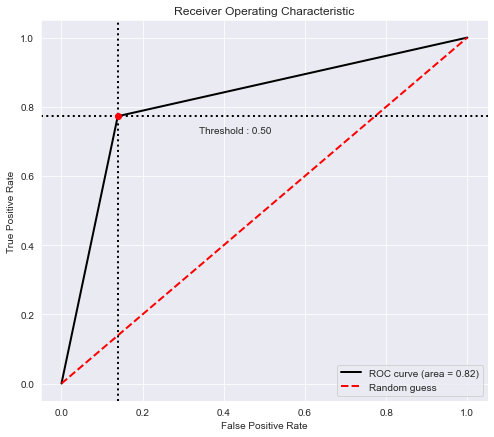

In [52]:
plot_roc_auc(Y_test,y_pred_knn)

# 2. XGBoost Classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks.

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s finished


RESULTS : 
XGBoost Model Accuracy :  0.84
XGBoost Model F1-score :  0.84
Report :
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      4572
         1.0       0.87      0.81      0.84      4571

    accuracy                           0.84      9143
   macro avg       0.84      0.84      0.84      9143
weighted avg       0.84      0.84      0.84      9143





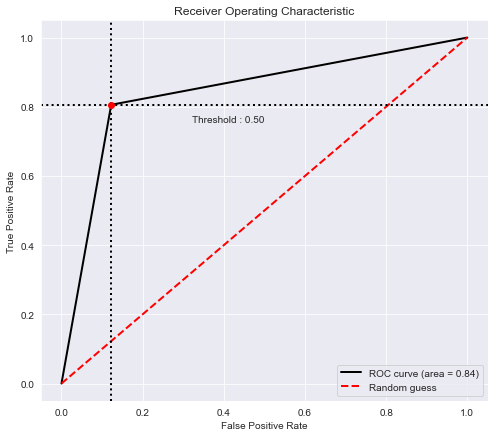

In [53]:
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
#from sklearn.calibration import CalibratedClassifierCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [5],
              'min_child_weight': [7],
              #'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100], #number of trees
              'seed': [1337]}

XGB = xgb.XGBClassifier()
XGB = GridSearchCV(XGB, parameters, cv = StratifiedKFold(5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=1, refit=True)
# XGB = CalibratedClassifierCV(XGB, method="sigmoid")
XGB.fit(X_train, Y_train,eval_metric='rmse')
y_pred_xgb = XGB.predict(X_test)
fscore = f1_score(Y_test,y_pred_xgb)
acc_xgb = accuracy_score(Y_test, y_pred_xgb)
result.append(acc_xgb)


print("RESULTS : ")
print("XGBoost Model Accuracy : ",round(acc_xgb,2))
print("XGBoost Model F1-score : ",round(fscore,2))
print("Report :\n",classification_report(Y_test,y_pred_xgb))

print('\n')
plot_roc_auc(Y_test,y_pred_xgb)

# 3. Random Forest Classifier

Random forest  is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

RESULTS :
Random Forest Model Accuracy :  0.74
Random Forest Model F1-score :  0.73
Classification Report :
               precision    recall  f1-score   support

         0.0       0.72      0.77      0.75      4572
         1.0       0.76      0.71      0.73      4571

    accuracy                           0.74      9143
   macro avg       0.74      0.74      0.74      9143
weighted avg       0.74      0.74      0.74      9143





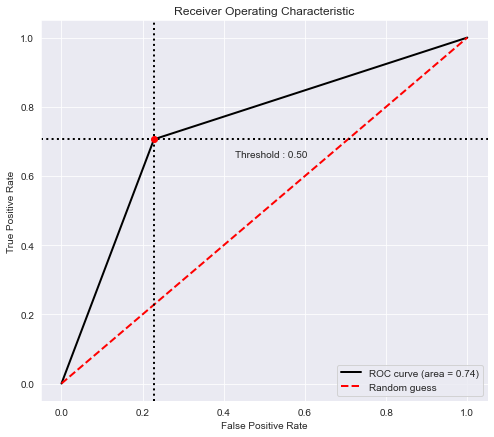

In [54]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=2, random_state= 59)
random_forest_model.fit(X_train, Y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
fscore = f1_score(Y_test,y_pred_random_forest)
acc_random_forest = accuracy_score(Y_test, y_pred_random_forest)
result.append(acc_random_forest)

print("RESULTS :")
print("Random Forest Model Accuracy : ",round(acc_random_forest,2))
print("Random Forest Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(Y_test,y_pred_random_forest))

print('\n')
plot_roc_auc(Y_test,y_pred_random_forest)

# 4. Artifical Neural Networks

RESULTS :
ANN Accuracy :  0.82
ANN F1-score :  0.8
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.77      0.91      0.83      4572
         1.0       0.89      0.73      0.80      4571

    accuracy                           0.82      9143
   macro avg       0.83      0.82      0.82      9143
weighted avg       0.83      0.82      0.82      9143







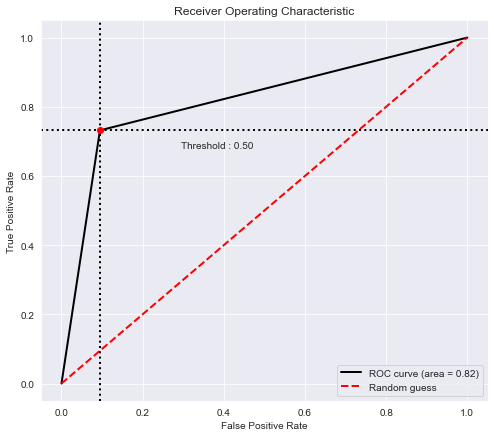

In [55]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,Y_train)

predict_train = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

fscore = f1_score(Y_test,y_pred)
acc_mlp = accuracy_score(y_pred, Y_test)
result.append(acc_mlp)

print("RESULTS :")
print("ANN Accuracy : ",round(acc_mlp,2))
print("ANN F1-score : ",round(fscore,2))
print("Classification Report : \n",classification_report(Y_test,y_pred))
print('\n')

print('\n')
plot_roc_auc(Y_test,y_pred)

# Final Results

In [56]:
results = pd.DataFrame({"Model Result ": result, 
                        "Models":["knn",
                                  "XGBoost",
                                  "RandomForest",
                                  "ANN"]})

results

,Model Result,Models
0,0.817018,knn
1,0.841627,XGBoost
2,0.739035,RandomForest
3,0.818550,ANN


### It is clear that XGBoost algorithm has best metrics: Accuracy, Recall, Precision, and ROC Auc.

# 6. Imputing our model on given test data

In [57]:
X_test = df_test_final.copy()

In [58]:
Y_pred = XGB.predict(X_test) 

In [59]:
submission = pd.DataFrame(test_data_copy['enrollee_id'])
submission["target"] = Y_pred

In [60]:
filename = 'H://submission.csv'
submission.to_csv(filename)

### Function that on given employee ID, gives target value:

In [73]:



def predict_target():
    from csv import reader
    employee = input('Enter employee ID:')
    # open file in read mode
    with open('D://Submission.csv', 'r') as read_obj:
        # pass the file object to reader() to get the reader object
        csv_sub = reader(read_obj)
        # Iterate over each row in the csv using reader object
        for rows in csv_sub:
            # row variable is a list that represents a row in csv
            if( rows[1] == employee):
                if (rows[2] == '0.0'):
                    print ("We found employee with ID: " + employee + " that is NOT looking for the job change: " + rows[2])
                elif (rows[2] == '1.0'):
                    print ("We found employee with ID: " + employee + " that is  looking for the job change: " + rows[2])
                else:
                    print("There is no emlpoyee with that ID")
       

In [74]:
predict_target()

Enter employee ID:217
We found employee with ID: 217 that is NOT looking for the job change: 0.0


In [75]:
predict_target()

Enter employee ID:31806
We found employee with ID: 31806 that is  looking for the job change: 1.0
